In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip -q install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [3]:
import pandas as pd
import csv 
import numpy as np 
from sklearn.model_selection import train_test_split
from pyDeepInsight import ImageTransformer, LogScaler

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deng-reads-RawCount-modefied.csv',header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [30]:
def shuffle_data(x):
    
    # save header
    tmp_head = x[0]

    #remove header 
    x = x[1:]

    # shuffle by row 
    np.random.shuffle(x)

    #stack header
    x = np.vstack((tmp_head,x))

    # shuffle by column after T transformation 
    x = x.T 

    tmp_head = x[0]
    x = x[1:]

    np.random.shuffle(x)

    x = np.vstack((tmp_head,x))

    return x 

In [39]:
mt = df.to_numpy()
print(mt)


mt = shuffle_data(mt)

print(mt)

[['type' '16cell' '16cell' ... 'zygote' 'zygote' 'zygote']
 ['Park7' 1436 1447 ... 2019 1330 796]
 ['Pf4' '0' '0' ... '0' '0' '0']
 ...
 ['Il12a' 0 0 ... 0 0 0]
 ['Slc4a11' 3129 1577 ... 0 0 0]
 ['B4galt1' 1731 1223 ... 0 59 5]]
[['type' 'Mtx2' 'Serpinb3b' ... 'Eif1ax' 'Vmn2r63' 'Dux']
 ['blast' 174 0 ... 947 0 0]
 ['2cell' 58 3 ... 1035 0 0]
 ...
 ['blast' 0 0 ... 3853 0 0]
 ['8cell' 148 0 ... 362 0 0]
 ['blast' 45 0 ... 2342 0 0]]


In [41]:
# retrive classficiation for each sample 

mt_Y = mt.T[0][1:]
print(mt_Y)

['blast' '2cell' 'blast' '8cell' '16cell' '2cell' '16cell' '2cell' 'blast'
 'blast' '8cell' 'blast' '8cell' 'blast' 'blast' 'blast' '2cell' '2cell'
 'blast' '8cell' '8cell' 'blast' 'blast' '16cell' '16cell' '16cell'
 'blast' 'blast' '2cell' 'blast' '16cell' 'blast' 'blast' 'blast' 'blast'
 '2cell' '2cell' '8cell' 'blast' 'zygote' 'blast' 'blast' 'blast' 'blast'
 'blast' 'blast' 'blast' '8cell' '4cell' 'zygote' 'blast' '16cell' 'blast'
 'blast' '16cell' 'zygote' 'blast' '16cell' '4cell' 'blast' 'blast'
 'blast' 'blast' '4cell' 'blast' '16cell' '4cell' '8cell' 'blast' '8cell'
 'blast' 'blast' '8cell' 'blast' '16cell' '4cell' 'blast' '8cell' 'blast'
 '8cell' 'blast' 'blast' '8cell' '16cell' 'zygote' 'blast' '8cell' 'blast'
 'blast' '8cell' '16cell' 'blast' 'blast' '16cell' 'blast' 'blast' 'blast'
 'blast' '16cell' '4cell' '16cell' 'blast' '16cell' 'blast' 'blast'
 '8cell' '8cell' '4cell' 'blast' '8cell' '16cell' 'blast' '16cell' 'blast'
 'blast' '8cell' 'zygote' '16cell' 'blast' 'blast' '

In [42]:
print(mt)

print("ha")

mt1 = mt[:,1:]

print(mt1)




[['type' 'Mtx2' 'Serpinb3b' ... 'Eif1ax' 'Vmn2r63' 'Dux']
 ['blast' 174 0 ... 947 0 0]
 ['2cell' 58 3 ... 1035 0 0]
 ...
 ['blast' 0 0 ... 3853 0 0]
 ['8cell' 148 0 ... 362 0 0]
 ['blast' 45 0 ... 2342 0 0]]
ha
[['Mtx2' 'Serpinb3b' 'Madcam1' ... 'Eif1ax' 'Vmn2r63' 'Dux']
 [174 0 0 ... 947 0 0]
 [58 3 0 ... 1035 0 0]
 ...
 [0 0 0 ... 3853 0 0]
 [148 0 0 ... 362 0 0]
 [45 0 0 ... 2342 0 0]]


In [49]:
mt_X = mt1[1:]
mt_X = mt_X.astype('float64')
print(mt_X)
print(mt_X.shape)

[[1.740e+02 0.000e+00 0.000e+00 ... 9.470e+02 0.000e+00 0.000e+00]
 [5.800e+01 3.000e+00 0.000e+00 ... 1.035e+03 0.000e+00 0.000e+00]
 [1.080e+02 0.000e+00 0.000e+00 ... 1.219e+03 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 3.853e+03 0.000e+00 0.000e+00]
 [1.480e+02 0.000e+00 0.000e+00 ... 3.620e+02 0.000e+00 0.000e+00]
 [4.500e+01 0.000e+00 0.000e+00 ... 2.342e+03 0.000e+00 0.000e+00]]
(268, 21297)


In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    mt_X, mt_Y, test_size=0.2)

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(214, 21297) (54, 21297) (214,) (54,)


In [52]:
ln = LogScaler()
x_train_norm = ln.fit_transform(x_train)
x_test_norm = ln.transform(x_test)


In [53]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=12345, 
                      n_jobs=-1)

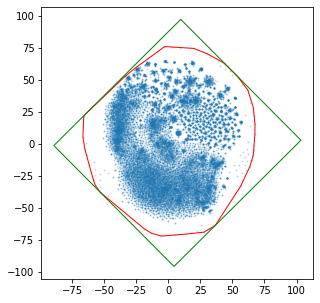

In [54]:
plt.figure(figsize=(5, 5))
_ = it.fit(x_train_norm, plot=True)

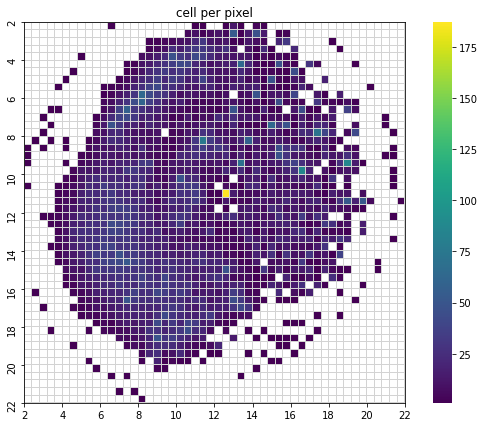

In [56]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("cell per pixel")

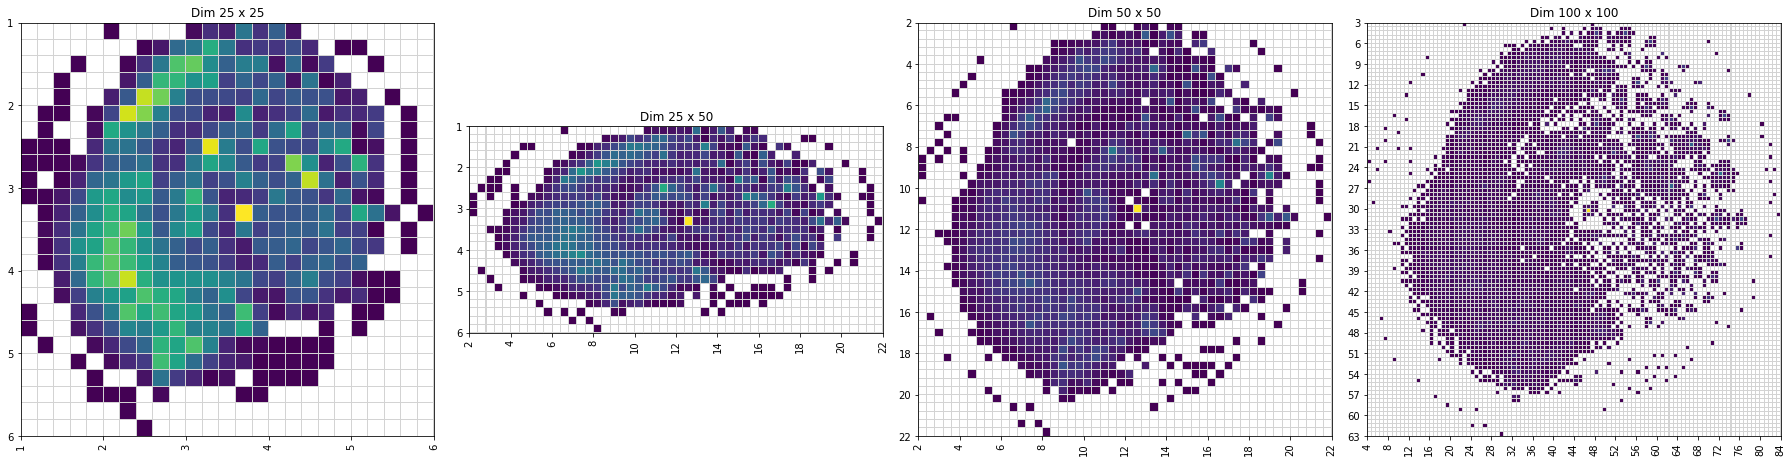

In [57]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()    
    
it.pixels = 50

In [58]:
x_train_img = it.transform(x_train_norm)

In [59]:
x_train_img.shape

(214, 50, 50, 3)

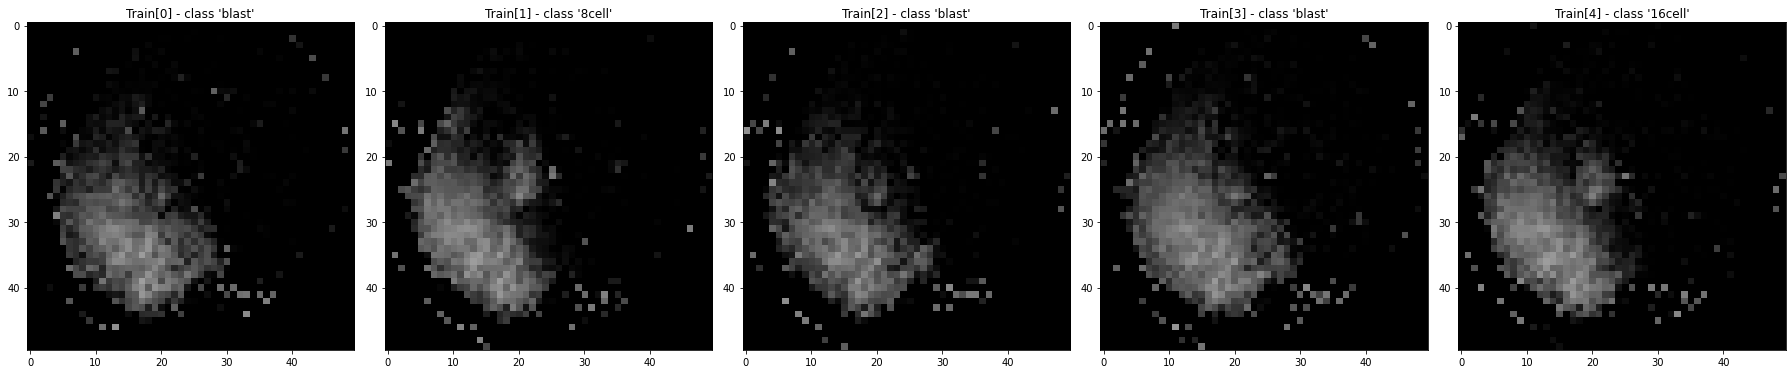

In [60]:
fig, ax = plt.subplots(1, 5, figsize=(25, 7))


for i in range(0,5):
    ax[i].imshow(x_train_img[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, y_train[i]))
plt.tight_layout()

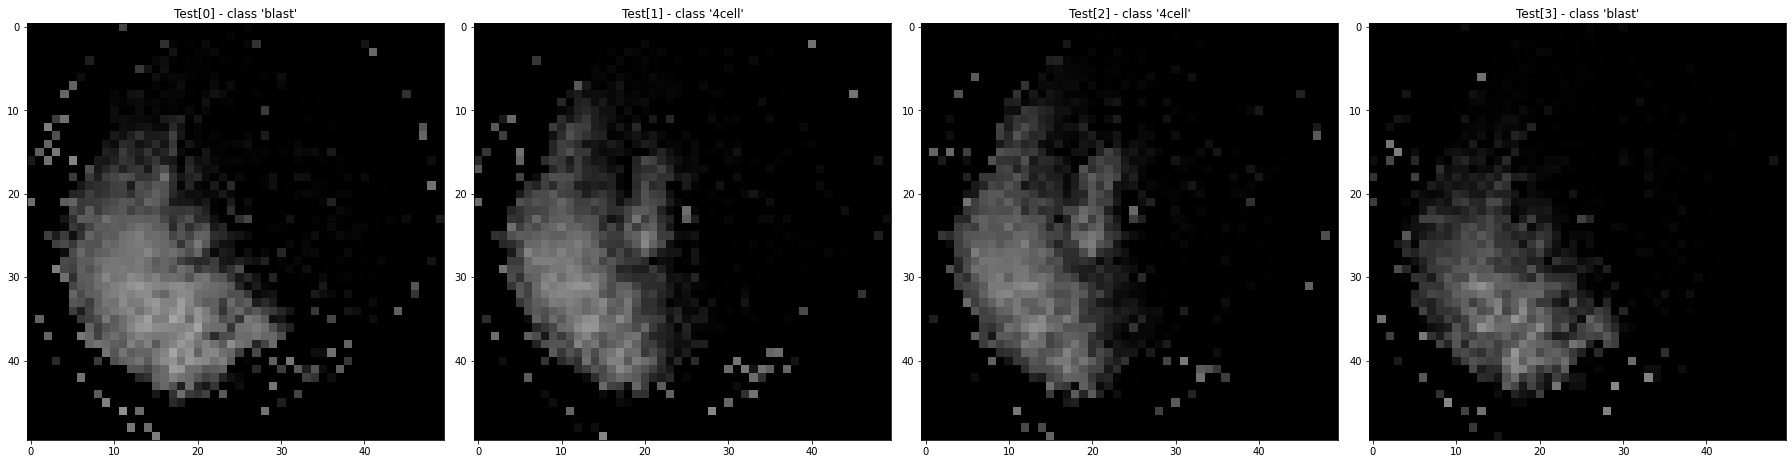

In [62]:
x_test_img = it.transform(x_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(x_test_img[i])
    ax[i].title.set_text("Test[{}] - class '{}'".format(i, y_test[i]))
plt.tight_layout()

In [63]:
# /content/drive/MyDrive/USYD/2021 S1/INFO4001/deepinsight_shuffle_img


# save image 

np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deepinsight_shuffle_img/x_train_img',x_train_img)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deepinsight_shuffle_img/x_test_img',x_test_img)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deepinsight_shuffle_img/y_train_img',y_train)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deepinsight_shuffle_img/y_test_img',y_test)